In [1]:
import pandas as pd
from helpers.helpers import set_size
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/banned_final.csv")
df = pd.read_csv("./data/banned_unfiltered.csv")
df.banDate = pd.to_datetime(df.banDate)
df_att = pd.read_csv("./data/joined_final.csv")
df_att.value_date = pd.to_datetime(df_att.value_date)

# $n$ table 2

In [3]:
df[["politician", "media_personality", "internet_personality", "fringe_movements"]].sum(axis=0).reset_index()

,index,0
0,politician,31
1,media_personality,51
2,internet_personality,65
3,fringe_movements,83


# $n$ table 3

In [4]:
df.groupby("reason").entity.count().reset_index()

,reason,entity
0,Hate/Harassment/Incitement to Violence,166
1,Manipulation/Misinformation,36
2,Other,73


# filtering

In [5]:
df

,entity,isRelevant,kind,searchTerm,banDate,sources,reason,reasonComment,isTemporary,platform,gid,article,qid,descriptions,politician,media_personality,internet_personality,fringe_movements
0,Al Jazeera,True,Organization,Al Jazeera,2017-09-18,https://www.aljazeera.com/news/2017/9/18/snapc...,Other,Other,False,snapchat,/m/027glbp,https://en.wikipedia.org/wiki/Al_Jazeera,Q13477,"Al Jazeera ʒæˈziːrɐ], literally ""The Island"", ...",False,False,False,False
1,Al-Manar,True,Organization,Al-Manar,2019-11-02,https://english.alarabiya.net/media/digital/20...,Other,Other,False,twitter,/m/04pgy_,https://en.wikipedia.org/wiki/Al-Manar,Q286478,Al-Manar is a Lebanese satellite television st...,False,False,False,False
2,Alex Jones,True,Person,Alex Jones,2018-08-02,https://www.usnews.com/news/best-states/texas/...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,spotify,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True
3,Alex Jones,True,Person,Alex Jones,2019-05-02,https://www.wired.com/story/facebook-bans-alex...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,facebook,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True
4,Alex Jones,True,Person,Alex Jones,2019-05-02,https://www.wired.com/story/facebook-bans-alex...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,True,instagram,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Unidan,True,Person,Unidan,2014-08-01,https://www.vice.com/en/article/8qx57x/reddits...,Manipulation/Misinformation,Manipulation/Misinformation,False,reddit,/m/0102bn54,https://en.wikipedia.org/wiki/Unidan,Q15982331,"Ben Eisenkop, better known by his Reddit pseud...",False,False,False,False
271,Wayne Allyn Root,True,Person,Wayne Allyn Root,2021-02-07,https://www.foxnews.com/media/twitter-suspends...,Manipulation/Misinformation,Manipulation/Misinformation,False,twitter,/m/027nqkk,https://en.wikipedia.org/wiki/Wayne_Allyn_Root,Q366532,Wayne Allyn Root is an American conservative r...,False,True,False,True
272,Win Gatchalian,True,Person,Win Gatchalian,2019-09-04,https://www.rappler.com/technology/social-medi...,Manipulation/Misinformation,Manipulation/Misinformation,True,twitter,/m/05q7hws,https://en.wikipedia.org/wiki/Win_Gatchalian,Q2606208,Sherwin Ting Gatchalian is a Filipino politici...,True,False,False,False
273,Yair Netanyahu,True,Person,Yair Netanyahu,2021-06-04,https://www.timesofisrael.com/yair-netanyahu-t...,Other,Sharing private information,True,facebook,/m/0j5wlrz,https://en.wikipedia.org/wiki/Yair_Netanyahu,Q35086816,Yair Netanyahu is the eldest son of former Isr...,False,False,False,False


In [6]:
df.entity.nunique()

171

In [7]:
display(df[df.banDate < pd.to_datetime("2016")].head())
df = df[df.banDate >= pd.to_datetime("2016")]
df.entity.nunique()

,entity,isRelevant,kind,searchTerm,banDate,sources,reason,reasonComment,isTemporary,platform,gid,article,qid,descriptions,politician,media_personality,internet_personality,fringe_movements
51,Charles C. Johnson,True,Person,Charles C. Johnson,2015-05-26,https://www.washingtonpost.com/news/the-inters...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,twitter,/g/11bw1wgv6n,https://en.wikipedia.org/wiki/Charles_C._Johnson,Q21005321,Charles Carlisle Johnson is an American far-ri...,False,False,False,True
54,Courtney Stodden,True,Person,Courtney Stodden,2011-10-13,https://www.usmagazine.com/celebrity-news/news...,Other,Lewd content,False,facebook,/m/0h8f_b_,https://en.wikipedia.org/wiki/Courtney_Stodden,Q5178675,Courtney Alexis Stodden is an American media p...,False,True,False,False
97,Hezbollah,True,Organization,Hezbollah,2012-08-19,https://www.upi.com/Science_News/Technology/20...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,facebook,/m/03m7d,https://en.wikipedia.org/wiki/Hezbollah,Q41053,Hezbollah is a Lebanese Shia Islamist politica...,False,False,False,False
98,IGN,True,Organization,IGN,2012-09-10,https://www.cinemablend.com/games/IGN-Gets-Sit...,Manipulation/Misinformation,Manipulation/Misinformation,True,reddit,/m/0dqmh5,https://en.wikipedia.org/wiki/IGN,Q207708,IGN is an American video game and entertainmen...,False,False,False,False
151,Maria Kang,True,Person,Maria Kang,2013-11-29,https://abcnews.go.com/Health/fit-mom-temporar...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,True,facebook,/m/01012_2k,https://en.wikipedia.org/wiki/Maria_Kang,Q21285289,"Maria Kang-Casler, is an American fitness advo...",False,False,True,False


163

In [8]:
display(df[df.kind != "Person"].head())
df = df[df.kind == "Person"]
df.entity.nunique()

,entity,isRelevant,kind,searchTerm,banDate,sources,reason,reasonComment,isTemporary,platform,gid,article,qid,descriptions,politician,media_personality,internet_personality,fringe_movements
0,Al Jazeera,True,Organization,Al Jazeera,2017-09-18,https://www.aljazeera.com/news/2017/9/18/snapc...,Other,Other,False,snapchat,/m/027glbp,https://en.wikipedia.org/wiki/Al_Jazeera,Q13477,"Al Jazeera ʒæˈziːrɐ], literally ""The Island"", ...",False,False,False,False
1,Al-Manar,True,Organization,Al-Manar,2019-11-02,https://english.alarabiya.net/media/digital/20...,Other,Other,False,twitter,/m/04pgy_,https://en.wikipedia.org/wiki/Al-Manar,Q286478,Al-Manar is a Lebanese satellite television st...,False,False,False,False
35,"Bharatiya Janata Party, Karnataka",True,Organization,"Bharatiya Janata Party, Karnataka",2020-02-12,https://www.newindianexpress.com/states/karnat...,Other,Other,True,twitter,/g/11j22ph3g2,https://en.wikipedia.org/wiki/Bharatiya_Janata...,Q85746854,"Bharatiya Janata Party, or simply, BJP is the ...",False,False,False,False
36,BitChute,True,Organization,BitChute,2020-08-07,https://www.techtimes.com/articles/251654/2020...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,twitter,/g/11gbwsyy7c,https://en.wikipedia.org/wiki/BitChute,Q45287179,BitChute is a video hosting service launched b...,False,False,False,False
37,BitChute,True,Organization,BitChute,2019-06-26,https://www.reddit.com/r/undelete/comments/c5t...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,reddit,/g/11gbwsyy7c,https://en.wikipedia.org/wiki/BitChute,Q45287179,BitChute is a video hosting service launched b...,False,False,False,False


140

In [9]:
display(df[~df.platform.isin(["facebook", "instagram", "twitter", "youtube"])].head())
df = df[df.platform.isin(["facebook", "instagram", "twitter", "youtube"])]
df.entity.nunique()

,entity,isRelevant,kind,searchTerm,banDate,sources,reason,reasonComment,isTemporary,platform,gid,article,qid,descriptions,politician,media_personality,internet_personality,fringe_movements
2,Alex Jones,True,Person,Alex Jones,2018-08-02,https://www.usnews.com/news/best-states/texas/...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,spotify,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True
8,Alex Jones,True,Person,Alex Jones,2018-08-06,https://www.vox.com/2018/8/6/17655658/alex-jon...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,apple podcasts,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True
65,Dieudonne,True,Person,Dieudonne,2020-08-10,https://www.antisemitism.co.il/2020/08/dieudon...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,tiktok,/m/09clhm,https://en.wikipedia.org/wiki/Dieudonn%C3%A9_M...,Q689494,"Dieudonné M'bala M'bala , generally known by h...",False,False,False,False
68,Donald Trump,True,Person,Donald Trump,2021-01-06,https://www.axios.com/platforms-social-media-b...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,snapchat,/m/0cqt90,https://en.wikipedia.org/wiki/Donald_Trump,Q22686,"Donald John Trump is an American politician, m...",True,True,False,False
78,Forsen,True,Person,Forsen,2020-09-29,https://www.sportskeeda.com/esports/the-forsen...,Other,Lewd content,True,twitch,/g/11b7x25_x_,https://en.wikipedia.org/wiki/Forsen,Q24204118,"Sebastian Hans Eli Fors , known by the pseudon...",False,False,True,False


136

In [10]:
display(df[~df.gid.isin(set(df_att.google_id))].head())
df = df[df.gid.isin(set(df_att.google_id))]
df.entity.nunique()

,entity,isRelevant,kind,searchTerm,banDate,sources,reason,reasonComment,isTemporary,platform,gid,article,qid,descriptions,politician,media_personality,internet_personality,fringe_movements
13,Amos Yee,True,Person,Amos Yee,2018-05-08,https://www.bbc.com/news/technology-44039616,Other,Other,False,youtube,/m/0131js8z,https://en.wikipedia.org/wiki/Amos_Yee,Q19841082,"Amos Yee Pang Sang , also known as just Amos Y...",False,False,True,False
14,Amos Yee,True,Person,Amos Yee,2017-11-11,https://www.theindependent.sg/amos-yee-is-bann...,Other,Other,False,facebook,/m/0131js8z,https://en.wikipedia.org/wiki/Amos_Yee,Q19841082,"Amos Yee Pang Sang , also known as just Amos Y...",False,False,True,False
15,Andile Mngxitama,True,Person,Andile Mngxitama,2019-10-31,https://www.citizen.co.za/news/2198636/mngxita...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,True,facebook,/g/11f6zxsb3p,https://en.wikipedia.org/wiki/Andile_Mngxitama,Q47890848,John Andile Mngxitama is a South African polit...,True,False,False,False
29,Belle Delphine,True,Person,Ben Garrison,2019-07-19,https://www.dexerto.com/entertainment/why-has-...,Other,Lewd content,False,instagram,/g/11h9bn8qlv,https://en.wikipedia.org/wiki/Belle_Delphine,Q65115154,"Mary-Belle Kirschner , better known as Belle D...",False,False,True,False
30,Belle Delphine,True,Person,Belle Delphine,2020-11-23,https://gamerant.com/belle-delphine-youtube-ch...,Other,Lewd content,True,youtube,/g/11h9bn8qlv,https://en.wikipedia.org/wiki/Belle_Delphine,Q65115154,"Mary-Belle Kirschner , better known as Belle D...",False,False,True,False


101

In [11]:
# Keep only one row per ban and sort per entity and ban date
df_bg = df[['entity','banDate','platform']].drop_duplicates().sort_values(['entity','banDate']).reset_index(drop=True)
# Compute number of days between each pair of consecutive bans
df_bg['diff_days'] = df_bg.groupby('entity').banDate.diff()
dict_nbg = {}  # store the number of ban groups for each diff
dict_bgs = {}  # store the list of ban groups for each diff
# Compute ban groups iteratively for each diff from 0 to 365 days
for days_diff in range(0, 366):
    bgid = 0
    bgids = []
    for i, row in df_bg.iterrows():
        if pd.isnull(row.diff_days) or row.diff_days >= pd.Timedelta(days=days_diff):
            bgid += 1
        bgids += [bgid]
    dict_nbg[days_diff] = len(list(set(bgids)))
    dict_bgs[days_diff] = bgids
    
selected_diff = 11

df = df.sort_values(['entity','banDate'])
# Add ban group id to the dataframe
df['bgid'] = dict_bgs[selected_diff]
# df.to_csv("./data/banned_final.csv", index=False)


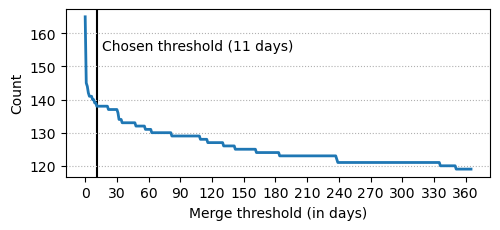

In [12]:
# Build the plot
fig, ax = plt.subplots(1, 1, figsize=(5, 2.3), gridspec_kw={"hspace": 0.5})
nbans = df_bg.shape[0]

ax.plot(dict_nbg.keys(), dict_nbg.values(), lw=2)
ax.set_xlabel('Merge threshold (in days)')
ax.set_ylabel('Count')
ax.axvline(11, color="black",zorder=-1 )
ax.text(16, 155, "Chosen threshold (11 days)", ha="left")
# plt.ylim(0, nbans*1.1)
ax.set_xticks(list(range(0,365,30)))
ax.yaxis.grid(True, ls=":", zorder=-2)
set_size(fig, (5,2.3))
fig.savefig("./images/bans.pdf", bbox_inches="tight")


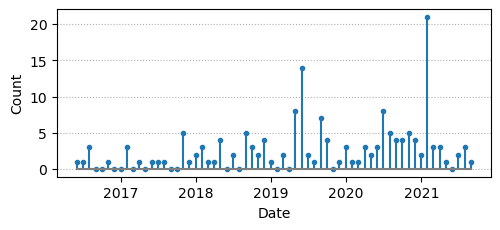

In [13]:

fig, ax = plt.subplots(1, 1, figsize=(5, 2.3), gridspec_kw={"hspace": 0.5})

import matplotlib.pyplot as plt
import seaborn as sns
x = df.groupby(pd.Grouper(freq="m", key="banDate"))\
    .entity.count()
ax.stem(x.index, x.values, markerfmt=".", basefmt="tab:gray")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.yaxis.grid(True, ls=":")
set_size(fig, (5,2.3))
fig.savefig("./images/bans2.pdf", bbox_inches="tight")

In [14]:
# Add ban group id to the dataframe
df['bgid'] = dict_bgs[selected_diff]

In [15]:
df[df['bgid'].duplicated(keep=False)]

,entity,isRelevant,kind,searchTerm,banDate,sources,reason,reasonComment,isTemporary,platform,gid,article,qid,descriptions,politician,media_personality,internet_personality,fringe_movements,bgid
5,Alex Jones,True,Person,Alex Jones,2018-08-06,https://www.vox.com/2018/8/6/17655658/alex-jon...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,facebook,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True,1
6,Alex Jones,True,Person,Alex Jones,2018-08-06,https://www.vox.com/2018/8/6/17655658/alex-jon...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,youtube,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True,1
7,Alex Jones,True,Person,Alex Jones,2018-08-06,https://www.vox.com/2018/8/6/17655658/alex-jon...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,instagram,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True,1
3,Alex Jones,True,Person,Alex Jones,2019-05-02,https://www.wired.com/story/facebook-bans-alex...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,facebook,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True,3
4,Alex Jones,True,Person,Alex Jones,2019-05-02,https://www.wired.com/story/facebook-bans-alex...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,True,instagram,/m/01_6j_,https://en.wikipedia.org/wiki/Alex_Jones,Q319121,Alexander Emerick Jones is an American far-rig...,False,True,True,True,3
63,Dieudonne,True,Person,Dieudonne,2020-08-03,https://www.aljazeera.com/news/2020/8/3/facebo...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,facebook,/m/09clhm,https://en.wikipedia.org/wiki/Dieudonn%C3%A9_M...,Q689494,"Dieudonné M'bala M'bala , generally known by h...",False,False,False,False,38
64,Dieudonne,True,Person,Dieudonne,2020-08-03,https://www.aljazeera.com/news/2020/8/3/facebo...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,instagram,/m/09clhm,https://en.wikipedia.org/wiki/Dieudonn%C3%A9_M...,Q689494,"Dieudonné M'bala M'bala , generally known by h...",False,False,False,False,38
69,Donald Trump,True,Person,Donald Trump,2021-01-06,https://www.axios.com/platforms-social-media-b...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,youtube,/m/0cqt90,https://en.wikipedia.org/wiki/Donald_Trump,Q22686,"Donald John Trump is an American politician, m...",True,True,False,False,39
70,Donald Trump,True,Person,Donald Trump,2021-01-07,https://www.timesofisrael.com/banned-from-face...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,facebook,/m/0cqt90,https://en.wikipedia.org/wiki/Donald_Trump,Q22686,"Donald John Trump is an American politician, m...",True,True,False,False,39
71,Donald Trump,True,Person,Donald Trump,2021-01-07,https://www.timesofisrael.com/banned-from-face...,Hate/Harassment/Incitement to Violence,Hate/Harassment/Incitement to Violence,False,instagram,/m/0cqt90,https://en.wikipedia.org/wiki/Donald_Trump,Q22686,"Donald John Trump is an American politician, m...",True,True,False,False,39


# Table 4

In [16]:
display(df.groupby("reason").entity.count().reset_index())

,reason,entity
0,Hate/Harassment/Incitement to Violence,116
1,Manipulation/Misinformation,23
2,Other,26


In [17]:
display(df.groupby("isTemporary").entity.count().reset_index())

,isTemporary,entity
0,False,110
1,True,55


In [18]:
display(df[["politician", "media_personality", "internet_personality", "fringe_movements"]].sum(axis=0).reset_index())

,index,0
0,politician,28
1,media_personality,33
2,internet_personality,40
3,fringe_movements,68


In [19]:
set(df_att.source)

{'gtab', 'wikimedia'}

# Coverage

In [20]:
df_att = df_att.merge(df.groupby("entity").banDate.agg(["min", "max"]).reset_index(), on="entity")

In [21]:
df_att

,entity,google_id,source,value_date,value,min,max
0,Alex Jones,/m/01_6j_,gtab,2015-04-16,1.157829,2018-08-06,2019-05-02
1,Alex Jones,/m/01_6j_,gtab,2015-05-16,1.157829,2018-08-06,2019-05-02
2,Alex Jones,/m/01_6j_,gtab,2015-06-16,1.323233,2018-08-06,2019-05-02
3,Alex Jones,/m/01_6j_,gtab,2015-07-16,1.488637,2018-08-06,2019-05-02
4,Alex Jones,/m/01_6j_,gtab,2015-08-16,1.157829,2018-08-06,2019-05-02
...,...,...,...,...,...,...,...
234853,Yair Netanyahu,/m/0j5wlrz,wikimedia,2022-08-28,125.000000,2021-06-04,2021-06-04
234854,Yair Netanyahu,/m/0j5wlrz,wikimedia,2022-08-29,150.000000,2021-06-04,2021-06-04
234855,Yair Netanyahu,/m/0j5wlrz,wikimedia,2022-08-30,122.000000,2021-06-04,2021-06-04
234856,Yair Netanyahu,/m/0j5wlrz,wikimedia,2022-08-31,122.000000,2021-06-04,2021-06-04


In [22]:
max(df_att.value_date)

Timestamp('2022-09-16 00:00:00')

In [23]:
tmp = df.groupby("entity").banDate.agg(["min", "max"]).reset_index()
maxv = max(df_att.value_date)
minv = min(df_att.value_date)

realiza = 0
expecta = 0
for idx, row in tmp.iterrows():
    row = dict(row)
    maxv = max(df_att.value_date)
#     print(row)
    daysv =  (
        min(maxv, (row["max"] + pd.DateOffset(months=12)))- 
        max(minv, (row["min"] - pd.DateOffset(months=12)))).days
    expect = daysv + daysv//30.4
    realiz = df_att[
        (df_att.entity == row["entity"]) &
        ((row["min"] - pd.DateOffset(months=12)) <= df_att.value_date) &
        ((row["max"] + pd.DateOffset(months=12)) >= df_att.value_date) 
    ]
    realiza += len(realiz)
    expecta += expect
realiza/expecta

#     print(len(realiz)/expect)

0.9535170845291602